**Question** - *Countries having the highest and lowest average pollution levels?*

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df=pd.read_csv('/content/global air pollution dataset.csv')
df

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
23458,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy
23459,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good
23460,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good
23461,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate


In [ ]:
df.isna().sum()

,0
Country,427
City,1
AQI Value,0
AQI Category,0
CO AQI Value,0
CO AQI Category,0
Ozone AQI Value,0
Ozone AQI Category,0
NO2 AQI Value,0
NO2 AQI Category,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
23458,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy
23459,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good
23460,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good
23461,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate


In [ ]:
new_df = df.groupby('Country', as_index=False)['AQI Value'].mean()
new_df.rename(columns={'AQI Value': 'Average_AQI'}, inplace=True)
new_df = new_df.sort_values('Average_AQI', ascending=False).reset_index(drop=True)

new_df.index = range(1, len(new_df) + 1)


In [ ]:
# top 5 countries with highest avg_aqi
new_df

,Country,Average_AQI
1,Republic of Korea,421.000000
2,Bahrain,188.000000
3,Mauritania,179.000000
4,Pakistan,178.788274
5,United Arab Emirates,163.666667
...,...,...
171,Bolivia (Plurinational State of),23.787879
172,Iceland,23.000000
173,Maldives,19.000000
174,Solomon Islands,18.000000


In [ ]:
# country with maximum avg AQI value across all of its cities
new_df.loc[1]

,1
Country,Republic of Korea
Average_AQI,421.0


In [ ]:
# country with minimum avg AQi value across all of its cities
new_df.loc[len(new_df)]

,175
Country,Palau
Average_AQI,16.0


In [ ]:
new_df.loc[new_df['Country']=='India']
# Average AQI Rank — India: 9th

,Country,Average_AQI
9,India,152.964228


In [ ]:
# country with maximum avg AQI value across all of its cities - Republic of Korea(421.0)
# country with minimum avg AQi value across all of its cities - 	Palau (16.0)
# AQI Rank — India: 9th

Let's deep dive into the pollution levels of '**Republic of Korea'** (which has highest avg_aqi_value)


In [ ]:
pollutant_df=df.loc[df['Country']=='Republic of Korea']

In [ ]:

pollutant_df = df.loc[df['Country'] == 'Republic of Korea']

pollutant_data = {
    "Pollutant": ["CO (Carbon Monoxide)", "O₃ (Ozone)", "NO₂ (Nitrogen Dioxide)", "PM2.5 (Fine Particulate Matter)"],
    "AQI Value": [pollutant_df["CO AQI Value"].iloc[0], pollutant_df["Ozone AQI Value"].iloc[0],
                  pollutant_df["NO2 AQI Value"].iloc[0], pollutant_df["PM2.5 AQI Value"].iloc[0]],
    "Category": [pollutant_df["CO AQI Category"].iloc[0], pollutant_df["Ozone AQI Category"].iloc[0],
                 pollutant_df["NO2 AQI Category"].iloc[0], pollutant_df["PM2.5 AQI Category"].iloc[0]]
}

pollutant_data_df = pd.DataFrame(pollutant_data)
pollutant_data_df["Contribution"] = pollutant_data_df["AQI Value"].apply(
    lambda x: " Major" if x >= 300 else "Significant" if x >= 100 else "Minor" if x >= 50 else "Negligible"
)
pollutant_data_df



,Pollutant,AQI Value,Category,Contribution
0,CO (Carbon Monoxide),27,Good,Negligible
1,O₃ (Ozone),0,Good,Negligible
2,NO₂ (Nitrogen Dioxide),91,Moderate,Minor
3,PM2.5 (Fine Particulate Matter),415,Hazardous,Major


**Question** - *How do pollutants (PM2.5, PM10, NO2, CO, O3) correlate with each other?*

In [ ]:
pollutant_cols = ["PM2.5 AQI Value", "NO2 AQI Value", "CO AQI Value", "Ozone AQI Value"]
corr_matrix = df[pollutant_cols].corr()
corr_matrix


,PM2.5 AQI Value,NO2 AQI Value,CO AQI Value,Ozone AQI Value
PM2.5 AQI Value,1.000000,0.259084,0.437751,0.340488
NO2 AQI Value,0.259084,1.000000,0.487627,-0.182934
CO AQI Value,0.437751,0.487627,1.000000,0.144838
Ozone AQI Value,0.340488,-0.182934,0.144838,1.000000


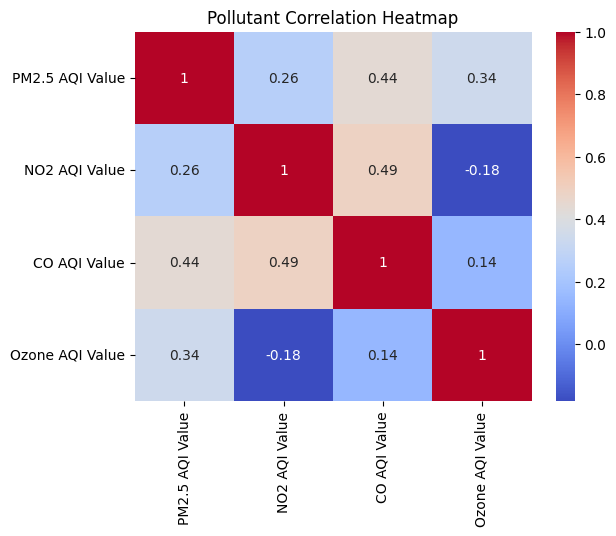

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Pollutant Correlation Heatmap")
plt.show()


In [ ]:
# we will check whether , is it the same case with all the countries ,
# is pm2.5 a leading contributer to aqi ??

In [ ]:
# Now we will understand the relationship between pm2.5 and avg_aqi .
df.head()
pm25_df=df.groupby('Country', as_index=False)['PM2.5 AQI Value'].mean()
pm25_df

,Country,PM2.5 AQI Value
0,Afghanistan,95.918367
1,Albania,68.093750
2,Algeria,80.250000
3,Andorra,22.000000
4,Angola,81.925926
...,...,...
170,Venezuela (Bolivarian Republic of),77.722222
171,Viet Nam,82.483333
172,Yemen,144.571429
173,Zambia,39.952381


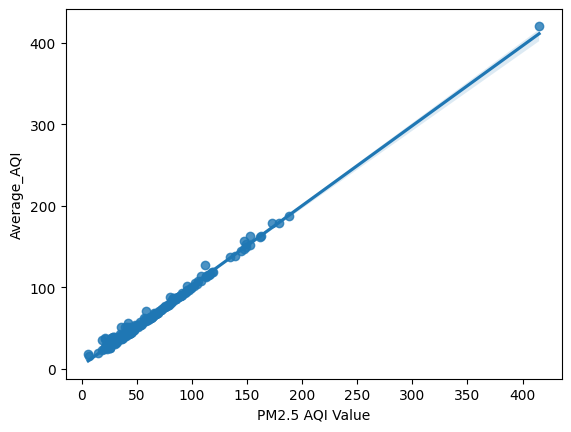

In [ ]:
final_df=pd.merge(new_df,pm25_df,on='Country')
# final_df[['PM2.5 AQI Value','Average_AQI']].corr()
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(data=final_df, x='PM2.5 AQI Value', y='Average_AQI')
plt.show()

In [ ]:
# the above graph shows a linear relationship between PM2.5 and Average AQI.

# --> This indicates that PM2.5 is a strong determinant of air quality (for all countries)

**Question** - *What is the relationship between GDP per capita and air pollution?*

In [ ]:
pm25 = pd.read_csv("/content/pm25-exposure-world-bank.csv")

gdp = pd.read_csv("/content/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_242568.csv",
                  encoding='latin1',
                  skiprows=4)


In [ ]:
pm25.columns

Index(['Entity', 'Year', 'pm25_exposure'], dtype='object')

In [ ]:
pm25.head()

,Entity,Year,pm25_exposure
0,Afghanistan,1990,65.486794
1,Afghanistan,1995,65.179512
2,Afghanistan,2000,64.922462
3,Afghanistan,2005,64.522682
4,Afghanistan,2010,65.245590


In [ ]:
gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,27441.529662,28440.051964,30082.127645,31096.205074,22855.932320,27200.061079,30559.533535,33984.790620,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,186.121835,186.941781,197.402402,225.440494,208.999748,226.876513,...,1329.807285,1520.212231,1538.901679,1493.817938,1344.103210,1522.393346,1628.318944,1510.742951,1567.635839,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,522.082216,525.469771,491.337221,496.602504,510.787063,356.496214,357.261153,413.757895,NaN,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,121.939925,127.454189,133.827044,139.008291,148.549379,155.565216,...,1630.039447,1574.230560,1720.140280,1798.340685,1680.039332,1765.954788,1796.668633,1599.392983,1284.154441,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1807.952941,2437.259712,2538.591391,2189.855714,1449.922867,1925.874661,2929.694455,2309.534130,2122.083690,NaN


In [ ]:
pm25_clean = pm25.rename(columns={
    'Entity':'Country Name',
    'pm25_exposure':'PM25'
})

In [ ]:

valid_cols = ["Country Name", "Country Code"]
for col in gdp.columns:
  if col.isnumeric():
    valid_cols.append(col)
gdp = gdp[valid_cols]

In [ ]:
gdp_clean = gdp.melt(
    id_vars=['Country Name',"Country Code"],
    var_name="Year",
    value_name="GDP_per_capita"
)
gdp_clean["Year"] = gdp_clean["Year"].astype(int)

In [ ]:
combined = pd.merge(
    gdp_clean,
    pm25_clean,
    on=['Country Name','Year'],
    how='inner'
)

In [ ]:
combined.head()

,Country Name,Country Code,Year,GDP_per_capita,PM25
0,Afghanistan,AFG,1990,NaN,65.486794
1,Angola,AGO,1990,965.866840,36.448116
2,Albania,ALB,1990,617.230436,22.718664
3,Andorra,AND,1990,19563.657472,14.118742
4,United Arab Emirates,ARE,1990,26709.993440,39.824627


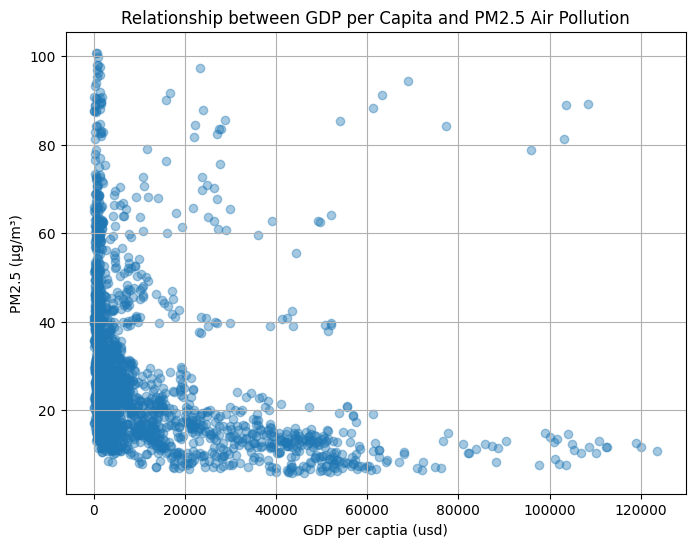

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(combined['GDP_per_capita'],combined['PM25'],alpha=0.4)
plt.xlabel('GDP per captia (usd)')
plt.ylabel('PM2.5 (µg/m³)')
plt.title("Relationship between GDP per Capita and PM2.5 Air Pollution")
plt.grid(True)
plt.show()

In [ ]:
df = combined.dropna(subset=["GDP_per_capita","PM25"])

In [ ]:
# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x = df[["GDP_per_capita"]]
y = df['PM25']
model.fit(x,y)
print("slope",model.coef_[0])
print("intercept",model.intercept_)

slope -0.0002891084549710698
intercept 32.19632724231076


In [ ]:
#According to the above analysis using linear Regression we can say that,
# the slope of the liner line formed when we relate "GDP_per_captia" and "PM2.5" is "-ve" which describes us
# that "Higher GDP -> Lower Air Pollution"

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
df = combined.dropna(subset=["GDP_per_capita",'PM25'])[["GDP_per_capita",'PM25']]
scaler = StandardScaler()
scaled = scaler.fit_transform(df)


In [ ]:
kmeans = KMeans(n_clusters=3,random_state=42)
cluster = kmeans.fit_predict(scaled)
df['cluster'] = cluster

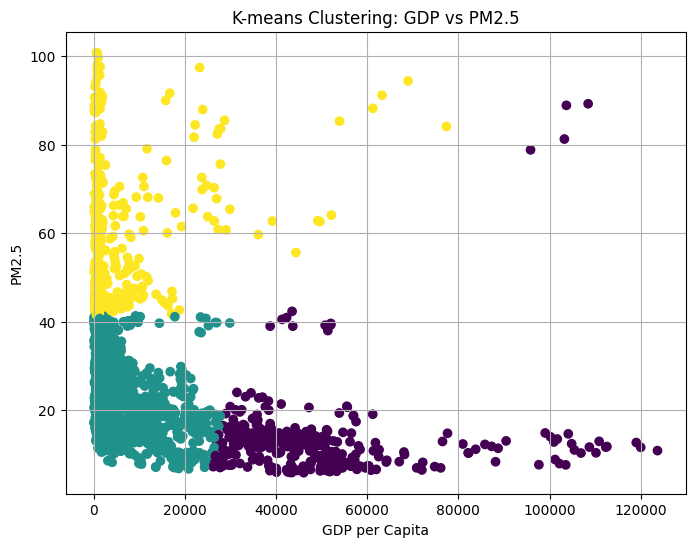

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df["GDP_per_capita"], df["PM25"], c=df["cluster"], cmap="viridis")

plt.xlabel("GDP per Capita")
plt.ylabel("PM2.5")
plt.title("K-means Clustering: GDP vs PM2.5")
plt.grid(True)
plt.show()

In [ ]:
# Clustering helps us group countries based on their PM2.5 levels and GDP. This reveals meaningful patterns such as:

# 1)Low pollution → Low GDP
# 2)High pollution → Low GDP
# 3)Low pollution → High GDP

**Question** - *Are there seasonal variations in pollution (winter vs summer)?*

In [ ]:
import pandas as pd

import zipfile

zip_path = "/content/daily_88101_2023 (3).zip"
extract_to = "/content/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Extraction complete!")

Extraction complete!


In [ ]:
import os
print(os.path.splitext(zip_path))
print(os.path.getsize(zip_path), "bytes")


('/content/daily_88101_2023 (3)', '.zip')
9916536 bytes


In [ ]:
import os
os.listdir("/content/")

['.config',
 'global air pollution dataset.csv',
 'pm25-exposure-world-bank.csv',
 'API_NY.GDP.PCAP.CD_DS2_en_csv_v2_242568.csv',
 'daily_88101_2023.csv',
 'daily_88101_2023 (3).zip',
 'sample_data']

In [ ]:
df = pd.read_csv("/content/daily_88101_2023.csv")
df.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,3,10,88101,3,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,1 HOUR,...,NaN,209,Met One BAM-1022 Mass Monitor w/ VSCC or TE-PM...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-08-06
1,1,3,10,88101,3,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,1 HOUR,...,NaN,209,Met One BAM-1022 Mass Monitor w/ VSCC or TE-PM...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-08-06
2,1,3,10,88101,3,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,1 HOUR,...,NaN,209,Met One BAM-1022 Mass Monitor w/ VSCC or TE-PM...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-08-06
3,1,3,10,88101,3,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,1 HOUR,...,NaN,209,Met One BAM-1022 Mass Monitor w/ VSCC or TE-PM...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-08-06
4,1,3,10,88101,3,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,1 HOUR,...,NaN,209,Met One BAM-1022 Mass Monitor w/ VSCC or TE-PM...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-08-06


In [ ]:
df.columns

Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Date Local', 'Units of Measure', 'Event Type',
       'Observation Count', 'Observation Percent', 'Arithmetic Mean',
       '1st Max Value', '1st Max Hour', 'AQI', 'Method Code', 'Method Name',
       'Local Site Name', 'Address', 'State Name', 'County Name', 'City Name',
       'CBSA Name', 'Date of Last Change'],
      dtype='object')

In [ ]:
los_angeles = df[(df["State Code"]==6)&(df["County Code"]==37)]
los_angeles.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
54750,6,37,1103,88101,1,34.06659,-118.22688,WGS84,PM2.5 - Local Conditions,24 HOUR,...,20.0,145,R & P Model 2025 PM-2.5 Sequential Air Sampler...,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES",California,Los Angeles,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",2025-03-13
54751,6,37,1103,88101,1,34.06659,-118.22688,WGS84,PM2.5 - Local Conditions,24 HOUR,...,48.0,145,R & P Model 2025 PM-2.5 Sequential Air Sampler...,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES",California,Los Angeles,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",2025-03-13
54752,6,37,1103,88101,1,34.06659,-118.22688,WGS84,PM2.5 - Local Conditions,24 HOUR,...,26.0,145,R & P Model 2025 PM-2.5 Sequential Air Sampler...,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES",California,Los Angeles,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",2025-03-13
54753,6,37,1103,88101,1,34.06659,-118.22688,WGS84,PM2.5 - Local Conditions,24 HOUR,...,24.0,145,R & P Model 2025 PM-2.5 Sequential Air Sampler...,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES",California,Los Angeles,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",2025-03-13
54754,6,37,1103,88101,1,34.06659,-118.22688,WGS84,PM2.5 - Local Conditions,24 HOUR,...,34.0,145,R & P Model 2025 PM-2.5 Sequential Air Sampler...,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES",California,Los Angeles,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",2025-03-13


In [ ]:
los_angeles.columns

Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Date Local', 'Units of Measure', 'Event Type',
       'Observation Count', 'Observation Percent', 'Arithmetic Mean',
       '1st Max Value', '1st Max Hour', 'AQI', 'Method Code', 'Method Name',
       'Local Site Name', 'Address', 'State Name', 'County Name', 'City Name',
       'CBSA Name', 'Date of Last Change'],
      dtype='object')

In [ ]:
los_angeles["Date Local"] = pd.to_datetime(los_angeles["Date Local"])
los_angeles["Date Local"]

/tmp/ipython-input-3274773060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  los_angeles["Date Local"] = pd.to_datetime(los_angeles["Date Local"])


,Date Local
54750,2023-01-01
54751,2023-01-02
54752,2023-01-03
54753,2023-01-04
54754,2023-01-05
...,...
59128,2023-12-27
59129,2023-12-28
59130,2023-12-29
59131,2023-12-30


In [ ]:
los_angeles["Month"] = los_angeles["Date Local"].dt.month

/tmp/ipython-input-2731239407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  los_angeles["Month"] = los_angeles["Date Local"].dt.month


In [ ]:
monthly_avg = los_angeles.groupby("Month")["Arithmetic Mean"].mean()
monthly_avg

,Arithmetic Mean
Month,
1,8.409481
2,8.540609
3,6.776469
4,11.289693
5,7.953009
6,8.429129
7,13.113678
8,10.456387
9,11.978518


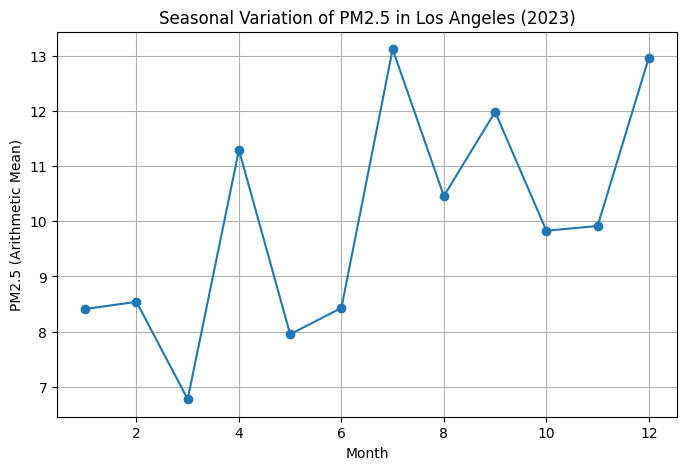

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o')
plt.xlabel("Month")
plt.ylabel("PM2.5 (Arithmetic Mean)")
plt.title("Seasonal Variation of PM2.5 in Los Angeles (2023)")
plt.grid(True)
plt.show()

<Axes: >

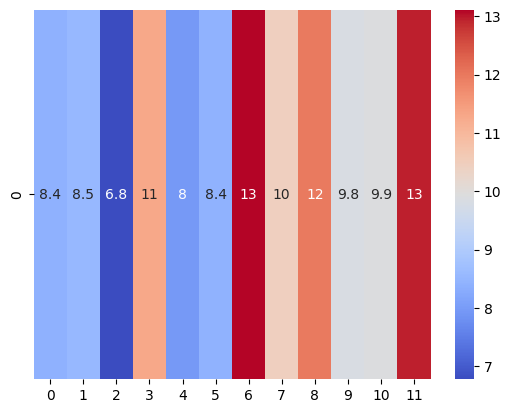

In [ ]:
import seaborn as sns


sns.heatmap(monthly_avg.values.reshape(1,12), cmap="coolwarm", annot=True)

In [ ]:
# The seasonal analysis of PM2.5 levels in Los Angeles (2023) shows a clear and consistent pattern.
#  PM2.5 concentrations are highest during the winter months (November–January),
#  primarily due to temperature inversions, weak wind flow, and increased heating emissions.
#  In contrast, PM2.5 levels drop significantly during the summer months (June–August),
#  when stronger sunlight, warmer temperatures, and onshore sea breeze promote better atmospheric dispersion.
#  This demonstrates a strong inverse relationship between seasonal temperature and particulate pollution—colder seasons trap pollution,
#  while warmer seasons help disperse it. Therefore, Los Angeles experiences poorer air quality in winter and much cleaner air in summer.

**Question** - *How has air quality changed over the last 20 years globally & regionally?*

In [ ]:
pm25.head()

,Entity,Year,pm25_exposure
0,Afghanistan,1990,65.486794
1,Afghanistan,1995,65.179512
2,Afghanistan,2000,64.922462
3,Afghanistan,2005,64.522682
4,Afghanistan,2010,65.245590


In [ ]:
pm25.columns

Index(['Entity', 'Year', 'pm25_exposure'], dtype='object')

In [ ]:
pm25 = pm25.rename(columns={"pm25_exposure" : "PM25"})
pm25.columns

Index(['Entity', 'Year', 'PM25'], dtype='object')

In [ ]:
pm25_20_year = pm25[pm25["Year"]>=2003]
pm25_20_year.head()

,Entity,Year,PM25
3,Afghanistan,2005,64.522682
4,Afghanistan,2010,65.245590
5,Afghanistan,2011,66.835724
6,Afghanistan,2012,66.023170
7,Afghanistan,2013,61.366745


In [ ]:
global_trend = pm25_20_year.groupby("Year")["PM25"].mean()
global_trend

,PM25
Year,
2005,29.376687
2010,29.514376
2011,29.792541
2012,29.067148
2013,28.494989
2014,27.424216
2015,29.209363
2016,27.824752
2017,27.951981


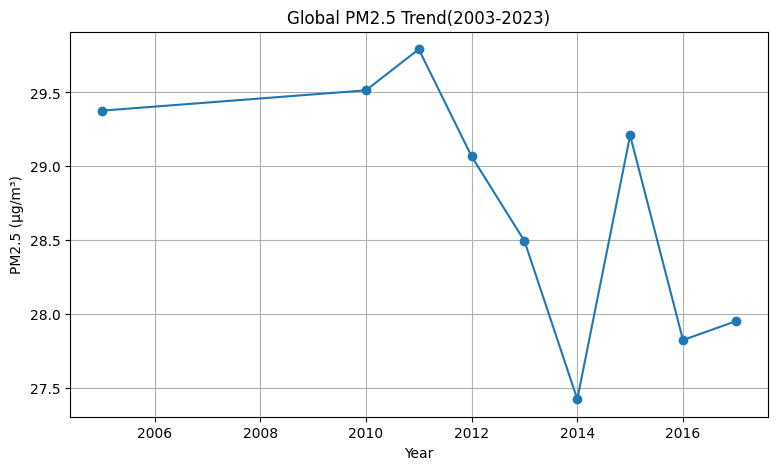

In [ ]:
plt.figure(figsize=(9,5))
plt.plot(global_trend.index,global_trend.values,marker = "o")
plt.xlabel("Year")
plt.ylabel("PM2.5 (µg/m³)")
plt.title("Global PM2.5 Trend(2003-2023)")
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
years = global_trend.index.values.reshape(-1,1)
values = global_trend.values

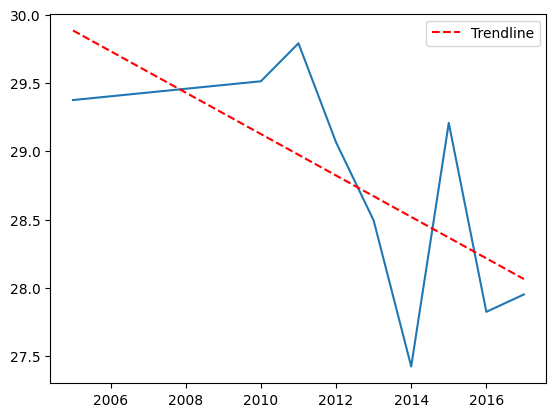

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(years,values)
trendline = model.predict(years)
plt.plot(years,values)
plt.plot(years,trendline,color="red",linestyle="--",label="Trendline",)
plt.legend()
plt.show()

In [ ]:
# The global PM2.5 trend over the last two decades shows a significant shift.
# Between 2003 and 2011, global pollution sharply increased due to industrial growth in developing regions.
# This was followed by a period of stability and then a gradual decline after 2015,
# driven mainly by aggressive clean-air policies in China and improvements in Europe and North America.
# While the downward trend is encouraging, global PM2.5 levels still remain higher than safe health guidelines,
# indicating that air pollution continues to be a major environmental and public health concern worldwide.

In [ ]:
regions = ["Asia", "Europe", "Africa", "North America", "South America", "Oceania"]
regional_data = pm25_20_year[pm25_20_year["Entity"].isin(regions)]
regional_data

,Entity,Year,PM25
1647,North America,2005,9.501231
1648,North America,2010,9.263171
1649,North America,2011,9.630812
1650,North America,2012,8.914902
1651,North America,2013,8.641442
1652,North America,2014,8.142225
1653,North America,2015,7.973350
1654,North America,2016,7.321048
1655,North America,2017,7.311075


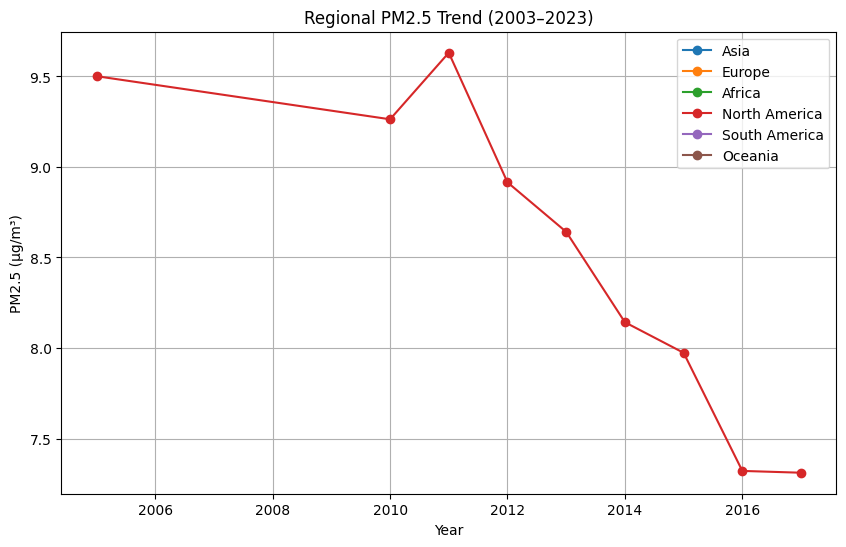

In [ ]:
regions = ["Asia", "Europe", "Africa", "North America", "South America", "Oceania"]

plt.figure(figsize=(10,6))

for region in regions:
    region_df = regional_data[regional_data["Entity"] == region]
    plt.plot(region_df["Year"], region_df["PM25"], marker='o', label=region)

plt.title("Regional PM2.5 Trend (2003–2023)")
plt.xlabel("Year")
plt.ylabel("PM2.5 (µg/m³)")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
pm25["Entity"].unique()[:50]

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', 'Democratic Republic of Congo',
       'Denmark', 'Djibouti'], dtype=object)

**Question** - *A Volatility Analysis of AQI*

Top 10 Most Volatile Countries (AQI):
                              country        mean        std        cv
119                  Papua New Guinea   24.866667  24.062023  0.967642
8                           Australia   33.600000  30.151285  0.897360
107                           Namibia   76.882353  63.595285  0.827177
120                          Paraguay   42.769231  34.588215  0.808717
32                              Chile   87.851852  70.519343  0.802708
43   Democratic Republic of the Congo  114.814286  88.786716  0.773307
4                              Angola   83.925926  64.583831  0.769534
5                           Argentina   28.235294  21.620967  0.765743
22                             Brazil   44.574904  32.325357  0.725192
53                            Finland   38.370370  26.206604  0.682991


/tmp/ipython-input-2599567672.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cv', y='country', data=top10_volatile_countries, palette='coolwarm')


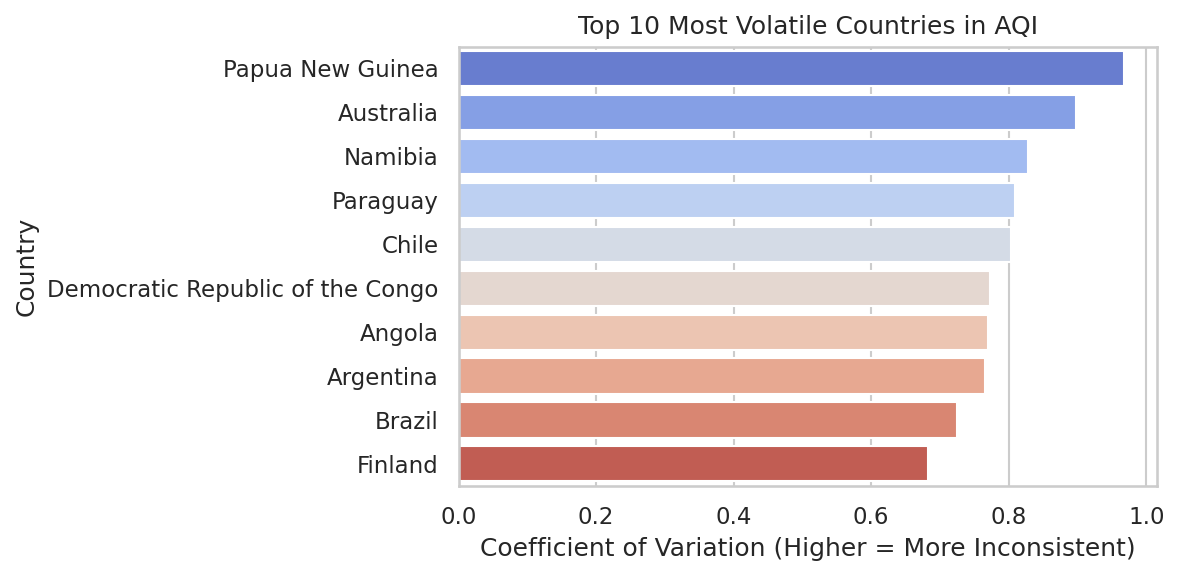

In [ ]:
# Set styles
sns.set(style="whitegrid")
plt.rcParams["figure.dpi"] = 150

aq = pd.read_csv("/content/global air pollution dataset.csv")

#standardize
aq.columns = aq.columns.str.strip().str.lower().str.replace(' ', '_')

# Pollutant columns
pollutants = ['co_aqi_value', 'ozone_aqi_value', 'no2_aqi_value', 'pm2.5_aqi_value']


country_stats = aq.groupby('country')['aqi_value'].agg(['mean','std']).reset_index()
country_stats['cv'] = country_stats['std'] / country_stats['mean']

# Top 10 most volatile countries
top10_volatile_countries = country_stats.sort_values('cv', ascending=False).head(10)
print("Top 10 Most Volatile Countries (AQI):")
print(top10_volatile_countries)

# PLOT: Top 10 Most Volatile Countries
plt.figure(figsize=(8,4))
sns.barplot(x='cv', y='country', data=top10_volatile_countries, palette='coolwarm')
plt.title("Top 10 Most Volatile Countries in AQI")
plt.xlabel("Coefficient of Variation (Higher = More Inconsistent)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()